#### <p style='text-align: justify;'>1. В ячейке с кодом заданы переменные, определяющие некоторые [термодинамические свойства](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D1%80%D0%BC%D0%BE%D0%B4%D0%B8%D0%BD%D0%B0%D0%BC%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%B2%D0%B5%D0%BB%D0%B8%D1%87%D0%B8%D0%BD%D1%8B) $\mathrm{CO_2}$ и $\mathrm{H_2O}$. Используя несколько вызовов функции `print()` и любой из рассмотренных на лекции  способов форматирования воспроизведите следующую таблицу:

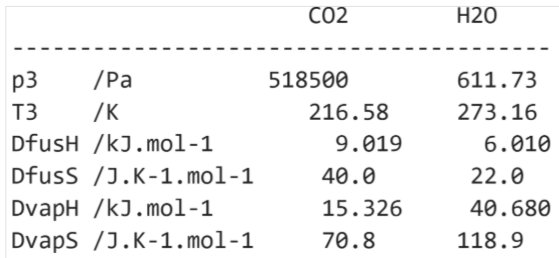

In [ ]:

T3_CO2, p3_CO2 = 216.58, 5.185e5 # Тройная точка CO2 (K, Pa)
DfusH_CO2 = 9.019                # Удельная теплота плавления CO2 (kJ.mol-1)
DfusS_CO2 = 40                   # Энтропия плавления CO2 (J.K-1.mol-1)
DvapH_CO2 = 15.326               # Удельная теплота парообразования CO2 (kJ.mol -1)
DvapS_CO2 = 70.8                 # Энтропия парообразования CO2 (J.K-1.mol -1)
T3_H2O, p3_H2O = 273.16, 611.73  # Тройная точка H2O (K, Pa)
DfusH_H2O = 6.01                 # Удельная теплота плавления H2O (kJ.mol-1)
DfusS_H2O = 22.0                 # Энтропия плавления H2O (J.K-1.mol-1)
DvapH_H2O = 40.68                # Удельная теплота парообразования H2O (kJ.mol -1)
DvapS_H2O = 118.89               # Энтропия парообразования H2O (J.K-1.mol -1)

print("                        CO₂         H₂O      ")
print("------------------------------------------")
print(f" p3 / Pa             {p3_CO2:<8.0f}      {p3_H2O:<8} ")
print(f" T3 / K                 {T3_CO2:<8.2f}   {T3_H2O:<8.2f} ")
print(f" ΔfusH / kJ·mol⁻¹         {DfusH_CO2:<8.3f}   {DfusH_H2O:<8.3f} ")
print(f" ΔfusS / J·K⁻¹·mol⁻¹     {DfusS_CO2:<8.1f}   {DfusS_H2O:<8.1f} ")
print(f" ΔvapH / kJ·mol⁻¹        {DvapH_CO2:<8.3f}   {DvapH_H2O:<8.3f} ")
print(f" ΔvapS / J·K⁻¹·mol⁻¹     {DvapS_CO2:<8.1f}  {DvapS_H2O:<8.1f} ")


#### <p style='text-align: justify;'>2. Экземпляры вида секвойи, <i>[Sequoia sempervirens](https://ru.wikipedia.org/wiki/%D0%A1%D0%B5%D0%BA%D0%B2%D0%BE%D0%B9%D1%8F)</i>, являются самыми старыми и самыми высокими живыми организмами на Замле. В файле `share/redwood-data.txt` содержится подробная информация о некоторых экземплярах данного вида. Файл является текстовым, в качестве разделителей используются символы табуляции `\t`, первые две строки (начинающиеся с `#`) являются заголовком:<br><br><img src="https://lk.challenges2024.ru/visualization/redwood-data.png" width="75%"><br><br>Напишите программу, считывающую данный файл и выводящую все строки, кроме строк заголовка (между ними не должно быть пустых строк).

In [ ]:
with open('share/redwood-data.txt', 'r') as file:
    for line in file:
        line = line.strip()
        if line and not line.startswith('#'):
            print(line)

#### <p style='text-align: justify;'>3. Напишите программу, считывающую файл `share/redwood-data.txt`и выводящую информацию о самом высоком дереве и о дереве с наибольшим диаметром.

In [ ]:
with open('share/redwood-data.txt', 'r') as tree:
    lines = tree.readlines()

data = []
for line in lines:
    if line.strip() and not line.startswith('#'):
        data.append(line.strip().split('\t'))

diameters = [float(row[2]) for row in data]
heights = [float(row[3]) for row in data]

max_diam_idx = diameters.index(max(diameters))
max_height_idx = heights.index(max(heights))

print(f"{data[max_diam_idx][0]} - максимальный диаметр {diameters[max_diam_idx]} м, локация: {data[max_diam_idx][1]}")
print(f"{data[max_height_idx][0]} - максимальная высота {heights[max_height_idx]} м, место произрастания: {data[max_height_idx][1]}")

#### <p style='text-align: justify;'>4. Напишите программу, создающую текстовый файл `atomic_numbers.txt` (если файл с таким названием уже существует, его надо перезаписать), в котором содержатся 2 колонки: атомные номера и символы для первых 18 элементов Периодической системы (каждая строка содержит информацию об одном элементе). Используйте приведённую строку со списком элементов.

In [ ]:
with open('atomic_numbers.txt', 'w') as file:
    for atomic_number, symbol in enumerate(element_list, start=1):
        file.write(f"{atomic_number:2d} {symbol:2s}\n")

#### <p style='text-align: justify;'>5*. Используя написанную на прошлом занятии программу вычисления числа изомерных алкильных углеводородных радикалов с $n$ атомами углерода $A_n$ можно вычислить последовательности $P_n$ и $Q_n$:<br>$P_0 =  0,\: P_{n+1}=\sum\limits_{i=0}^n \sum\limits_{j=0}^i \sum\limits_{l=0}^{n-i} \left(A_jA_{i-j}A_lA_{n-i-l}\right) + 6\sum\limits_{i=0}^{n//2} \sum\limits_{j=0}^{n-2i} \left(A_iA_jA_{n-2i-j}\right) \\ + 8\sum\limits_{i=0}^{n//3} \left(A_iA_{n-3i}\right) + \underbrace{3\sum\limits_{i=0}^{n//2} \left(A_iA_{n//2-i}\right)}_{если\:n\:кратно\:2} + \underbrace{6 A_{n//4}}_{если\:n \\ кратно\:4}$<br>$Q_0 =  0,\: Q_n=\sum\limits_{i=1}^{n-1} \left(A_iA_{n-i}\right) + \underbrace{ A_{n//2}}_{если\:n\: \\ кратно\:2}$<br>Используя элементы последовательностей $P_n$ и $Q_n$ можно вычислить число изомерных алканов с $n$ атомами углерода $C_n$:<br>$C_0 =  0,\:C_n = \frac{P_n}{24} - \frac{Q_n}2 + \underbrace{ A_{n//2}}_{если\:n\: \\ кратно\:2}$<br>Напишите программу, которая запрашивает число $k$, создаёт файл `alkanes.txt` (если файл с таким названием уже существует, его надо перезаписать), в котором содержатся 2 колонки: число атомов углерода (от $1$ до $k$) и число изомерных алканов с этим количеством атомов углерода. Например, в строке $10$ должно быть написано: $10 \: \: \: \: 75$ (доп. информация: $P_{10} = 13176, \: Q_{10} = 964$).

In [ ]:
def ak(k: int) -> list:
    a = [1,1,1,2]
    if k < 4:
        return a
    for n in range(3, k):
        s = 0
        for i in range(n + 1):
            for j in range(n - i + 1):
                s += a[i] * a[j] * a[n - i - j]
        s1 = 0
        for i in range(n // 2 + 1):
            s1 += a[i] * a[n - 2 * i]
        a.append((s + s1 * 3 + 2 * a[n // 3]) // 6)
    return a

def pn(n: int) -> int:
    if n == 0:
        return 0
    n -= 1
    s0,s1,s2,s3,s4 = 0,0,0,0,0
    li = ak(n)
    for i in range(n+1):
        for j in range(i+1):
            for l in range(n-i+1):
                s0 += li[j]*li[i-j]*li[l]*li[n-i-l]
    for i in range(n // 2 + 1):
        for j in range(n - 2 * i + 1):
            s1 += li[n - 2 * i - j] * li[i] * li[j]
    s1 *= 6
    for i in range(n // 3 + 1):
        s2 += li[i] * li[n - 3 * i]
    s2 *= 8
    if n % 2 == 0:
        for i in range(n // 2 + 1):
            s3 += li[i] * li[n // 2 - i]
        s3 *= 3
    if n % 4 == 0:
        s4 = 6 * li[n//4]
    return s0+s1+s2+s3+s4

def qn(n: int) -> int:
    if n == 0:
        return 0
    s = 0
    li = ak(n-1)
    for i in range(1, n):
        s += li[i] * li[n-i]
    if n % 2 == 0:
        s += li[n//2]
    return s

def cn(n: int) -> int:
    return int(pn(n) / 24 - qn(n) / 2 + ak(n)[n//2] * int(n % 2 == 0))


with open("alkanes.txt", "w") as f:
    rr = int(input("input integer number: "))
    r = len(str(cn(rr + 1)))
    for i in range(rr):
        f.write("%3i\t%*i\n" % (i + 1, r, cn(i+1)))